In [1]:
import os
import torch
from PIL import Image
import matplotlib.pyplot as plt
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

/root/miniconda3/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-05-03 18:41:03.427528: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-05-03 18:41:04.348606: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(
    "./ip2p-finetune-output-fullset",
    # "timbrooks/instruct-pix2pix",
    torch_dtype=torch.float16,
    safety_checker=None, 
).to("cuda")

pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

Loading pipeline components...: 100%|██████████| 6/6 [00:00<00:00,  8.26it/s]


  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:03<00:00, 30.83it/s]


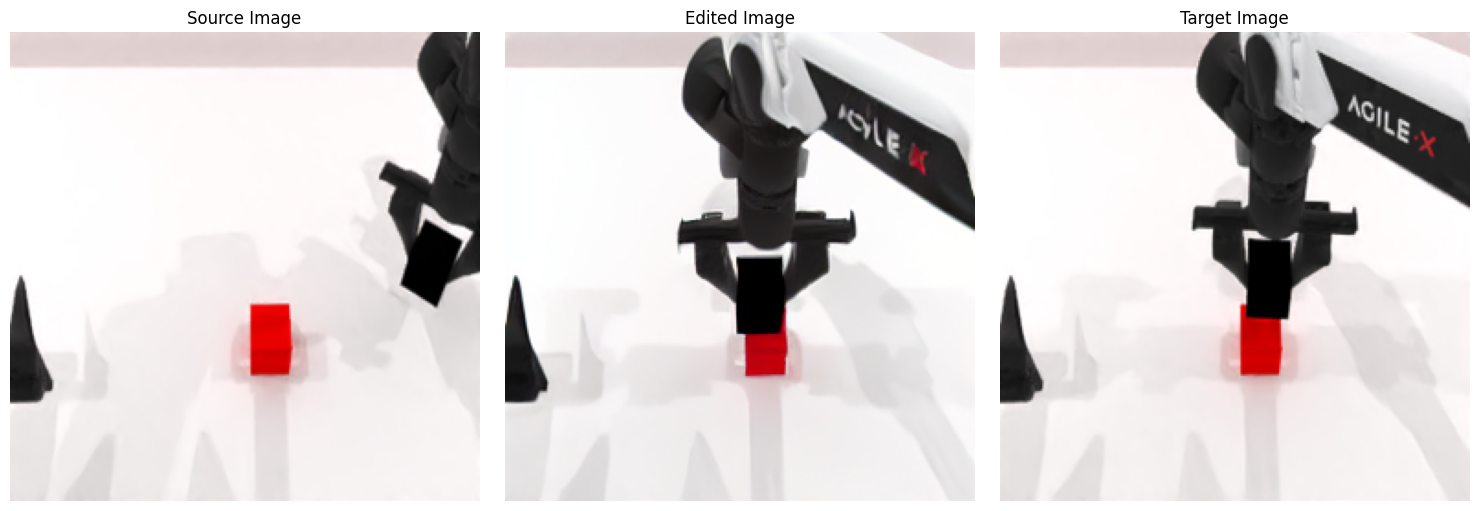

In [8]:
path = "data_long_interval/test/1020"
source_image = Image.open(os.path.join(path ,"source.png")).convert("RGB").resize((256, 256))
target_image = Image.open(os.path.join(path ,"target.png")).convert("RGB").resize((256, 256))


# prompt = "beat the block with the hammer"

# prompt =  "handover the blocks"

# stack blocks
prompt = "Red and black cubes are placed randomly on the table. The robotic arm stacks the cubes in order, placing the red cubes first, followed by the black cubes, in the designated target location."

edited_image = pipe(prompt=prompt, image=source_image).images[0]

fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(source_image)
axs[0].axis('off')
axs[0].set_title("Source Image")
axs[1].imshow(edited_image)
axs[1].axis('off')
axs[1].set_title("Edited Image")
axs[2].imshow(target_image)
axs[2].axis('off')
axs[2].set_title("Target Image")
plt.tight_layout()
plt.show()